## Deep Learning Course (980)
## Assignment Two: Convolutional Neural Networks

__Assignment Goals__:
- Design and implementation of CNNs.
- Understanding the different effects of linear and nonlinear activation functions.
- CNN visualization.

In this assignment, you will be asked to learn a CNN model for an image dataset. Different experiments will help you achieve a better understanding of CNNs. 

__DataSet__: the dataset consists of around 9K images (some grayscale and some RGB) belonging to 101 classes. The shape of each image is (64,64,3). Every image is labeled with one of the classes. The image file is contained in the folder named after the class name.

1. We are aiming to lean a CNN on the dataset. Download the dataset, and use TensorFlow to implement LeNet5 to classify instances. Use a one-hot encoding for labels. Split the dataset into training (90 percent) and validation (10 percent) and report the model loss (cross-entropy) and accuracy on both sets. Try to improve model accuracy on the validation dataset by tuning the model hyperparameters. You can use regularization to prevent overfitting. The model performance is a part of the overall evaluation (35 points). The LeNet5 configuration is:
  - Convolutional layer (kernel size 5 x 5, 32 filters, stride 1 x 1 and followed by ReLU)
  - Max Pooling layer subsampling by 4 and stride 4 x 4 
  - Convolutional layer (kernel size 5 x 5, 64 filters, stride 1 x 1 and followed by ReLU)
  - Max Pooling layer subsampling by 4 and stride 4 x 4
  - Fully Connected ReLU layer that has input 7764 and output 1024 
  - Fully Connected ReLU layer that has input 1024 and output 84 
  - Fully Connected Softmax layer that has input 84 and output which is equal to the number of classes (one node for each of the classes).
2. What happens if we use a linear activation function in all convolutions and dense layers (except softmax in the last fully connected layer)? Compare training and validation loss (cross-entropy) after and before changing the activation function. Can we compensate for the effect of removing the non-linear activation function by adding more convolution linear layers? Explain your answer. (20 points)
3. There are several approaches to understand and visualize convolutional Networks, including visualizing the activations and layers weights. The most straight-forward visualization technique is to show the activations of the network during the forward pass. The second most common strategy is to visualize the weights. The weights are useful to visualize because well-trained networks usually display nice and smooth filters without any noisy patterns.  Please visualize the filters (i.e., the first layer convolution weights) which your CNN has learned for this task. Use the trained non-linear CNN model which you implemented in section 1. (Reference: for more information we recommend the course notes on "Visualizing what ConvNets learn" http://cs231n.github.io/understanding-cnn/. More advanced techniques can be found in "Visualizing and Understanding Convolutional Networks" paper by Matthew D.Zeiler and Rob Fergus.) (35 points)

__NOTE__: Please use Jupyter Notebook. The notebook should include the final code, results and your answers. You should submit your Notebook in (.pdf or .html) and .ipynb format. (10 points) 

__Instructions__:

The university policy on academic dishonesty and plagiarism (cheating) will be taken very seriously in this course. Everything submitted should be your own writing or coding. You must not let other students copy your work. Spelling and grammar count.

Your assignments will be marked based on correctness, originality (the implementations and ideas are from yourself), clarification and test performance.


# Using one late day

In [1]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [24]:
data_dir = "./ImagesDataset/101_ObjectCategories_resized/"
data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))

print(image_count)

Labels = np.array([item.name for item in data_dir.glob('*')])

# tf.__version__

8677


In [3]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))
# print(list_ds.numpy())

# Split of dataset into 90:10 train:valid

In [6]:
# for f in list_ds.take(5):
#   print(f.numpy())

def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  return parts[-2] == Labels

def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return img

def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

# Dataset Divided in 70:30 ratio    
labeled_ds = labeled_ds.shuffle(image_count)
train_dataset = labeled_ds.take(int(.9*image_count))
test_dataset = labeled_ds.skip(int(.9*image_count)).take(image_count - int(.9*image_count))


# Adding batch to image channels using cache 

## Tensorflow doc and examples used as reference

In [7]:
BATCH_SIZE = 90

def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(BATCH_SIZE)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

In [8]:

train_ds = prepare_for_training(train_dataset)
test_ds = prepare_for_training(test_dataset)

# Vanila Model.

## The below model is the same model given in the assignment instruction.

No modification made in this network.

Adam optimizer, 
Batch size = 90
steps per epoch = 100
epochs = 20
Learning rate = 0.01

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        2400      
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51200     
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

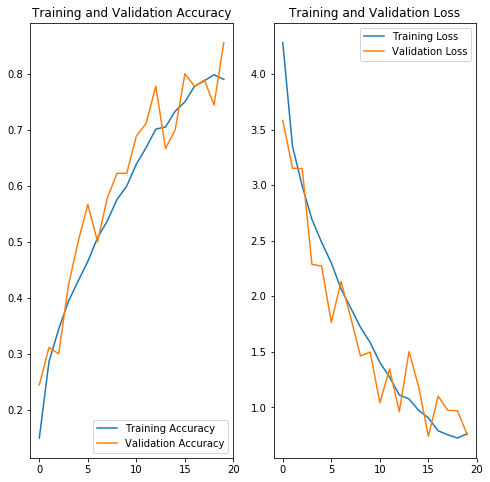

In [9]:

model_initial = tf.keras.Sequential(
  [
      
      tf.keras.layers.Conv2D(kernel_size=5, filters=32, padding='same', strides = 1,input_shape=(64,64,3)),
      tf.keras.layers.Activation('relu'),
      tf.keras.layers.MaxPool2D(pool_size=(4, 4), strides=4, padding='valid'),

      
      tf.keras.layers.Conv2D(kernel_size=5, filters=64, padding='same', strides=1),
      tf.keras.layers.Activation('relu'),
      tf.keras.layers.MaxPool2D(pool_size=(4, 4), strides=4, padding='valid'),
      
      tf.keras.layers.Flatten(),
      
      tf.keras.layers.Dense(1024),
      tf.keras.layers.Activation('relu'),
      tf.keras.layers.Dense(84, activation='relu'),
      tf.keras.layers.Dense(101, activation='softmax')
  ])

model_initial.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# print model layers
model_initial.summary()

steps_per_epoch = 9000//BATCH_SIZE  # 60,000 items in this dataset
EPOCHS = 20
print("Steps per epoch: ", steps_per_epoch)

history_initial = model_initial.fit(train_ds, steps_per_epoch=steps_per_epoch, epochs=EPOCHS,
                    validation_data=test_ds, validation_steps=1)

acc = history_initial.history['accuracy']
val_acc = history_initial.history['val_accuracy']

loss=history_initial.history['loss']
val_loss=history_initial.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Vanila Model (As mentioned in the Assignment) with Linear Activation

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 32)        2400      
_________________________________________________________________
activation_3 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        51200     
_________________________________________________________________
activation_4 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

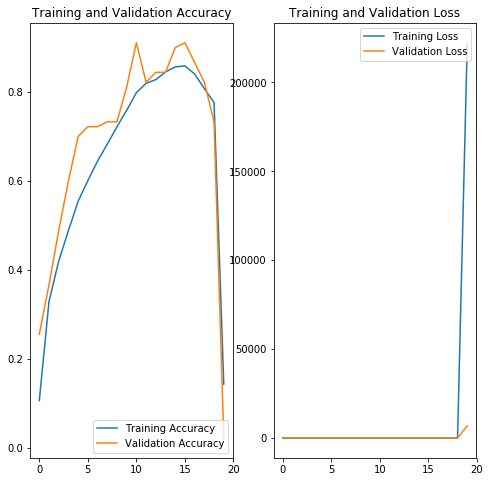

In [10]:

model_initial_Linear = tf.keras.Sequential(
  [
      
      tf.keras.layers.Conv2D(kernel_size=5, filters=32, padding='same', strides = 1,input_shape=(64,64,3)),
      tf.keras.layers.Activation('linear'),
      tf.keras.layers.MaxPool2D(pool_size=(4, 4), strides=4, padding='valid'),

      
      tf.keras.layers.Conv2D(kernel_size=5, filters=64, padding='same', strides=1),
      tf.keras.layers.Activation('linear'),
      tf.keras.layers.MaxPool2D(pool_size=(4, 4), strides=4, padding='valid'),
      
      tf.keras.layers.Flatten(),
      
      tf.keras.layers.Dense(1024),
      tf.keras.layers.Activation('linear'),
      tf.keras.layers.Dense(84, activation='linear'),
      tf.keras.layers.Dense(101, activation='softmax')
  ])

model_initial_Linear.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# print model layers
model_initial_Linear.summary()

steps_per_epoch = 9000//BATCH_SIZE  # 60,000 items in this dataset
EPOCHS = 20
print("Steps per epoch: ", steps_per_epoch)

history_initial_Linear = model_initial_Linear.fit(train_ds, steps_per_epoch=steps_per_epoch, epochs=EPOCHS,
                    validation_data=test_ds, validation_steps=1)

acc = history_initial_Linear.history['accuracy']
val_acc = history_initial_Linear.history['val_accuracy']

loss=history_initial_Linear.history['loss']
val_loss=history_initial_Linear.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Linear Model with one more convolution layer

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 32)        2400      
_________________________________________________________________
activation_6 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        51200     
_________________________________________________________________
activation_7 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 128)        

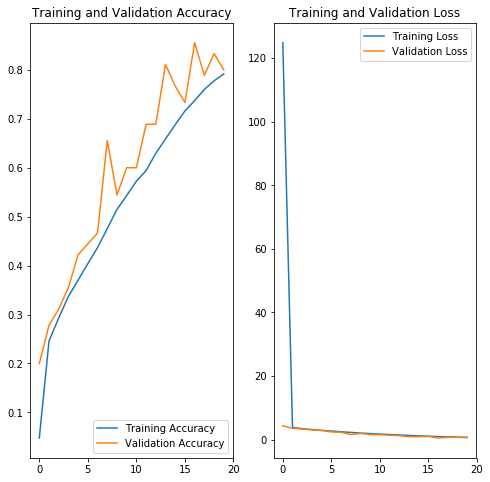

In [11]:

modelLinear = tf.keras.Sequential(
  [
      
      tf.keras.layers.Conv2D(kernel_size=5, filters=32, padding='same', strides = 1,input_shape=(64,64,3)),
      tf.keras.layers.Activation('linear'),
      tf.keras.layers.MaxPool2D(pool_size=(4, 4), strides=4, padding='valid'),

      
      tf.keras.layers.Conv2D(kernel_size=5, filters=64, padding='same', strides=1),
      tf.keras.layers.Activation('linear'),
      tf.keras.layers.MaxPool2D(pool_size=(4, 4), strides=4, padding='valid'),
      
      tf.keras.layers.Conv2D(kernel_size=5, filters=128, padding='same', strides=1),
      tf.keras.layers.Activation('linear'),
      tf.keras.layers.MaxPool2D(pool_size=(4, 4), strides=4, padding='valid'),
      
      tf.keras.layers.Flatten(),
      
      tf.keras.layers.Dense(1024),
      tf.keras.layers.Activation('linear'),
      tf.keras.layers.Dense(84, activation='linear'),
      tf.keras.layers.Dense(101, activation='softmax')
  ])

modelLinear.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# print model layers
modelLinear.summary()

steps_per_epoch = 9000//BATCH_SIZE  # 60,000 items in this dataset
EPOCHS = 20
print("Steps per epoch: ", steps_per_epoch)

historyLinear = modelLinear.fit(train_ds, steps_per_epoch=steps_per_epoch, epochs=EPOCHS,
                    validation_data=test_ds, validation_steps=1)

acc = historyLinear.history['accuracy']
val_acc = historyLinear.history['val_accuracy']

loss=historyLinear.history['loss']
val_loss=historyLinear.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Comparision of Different networks

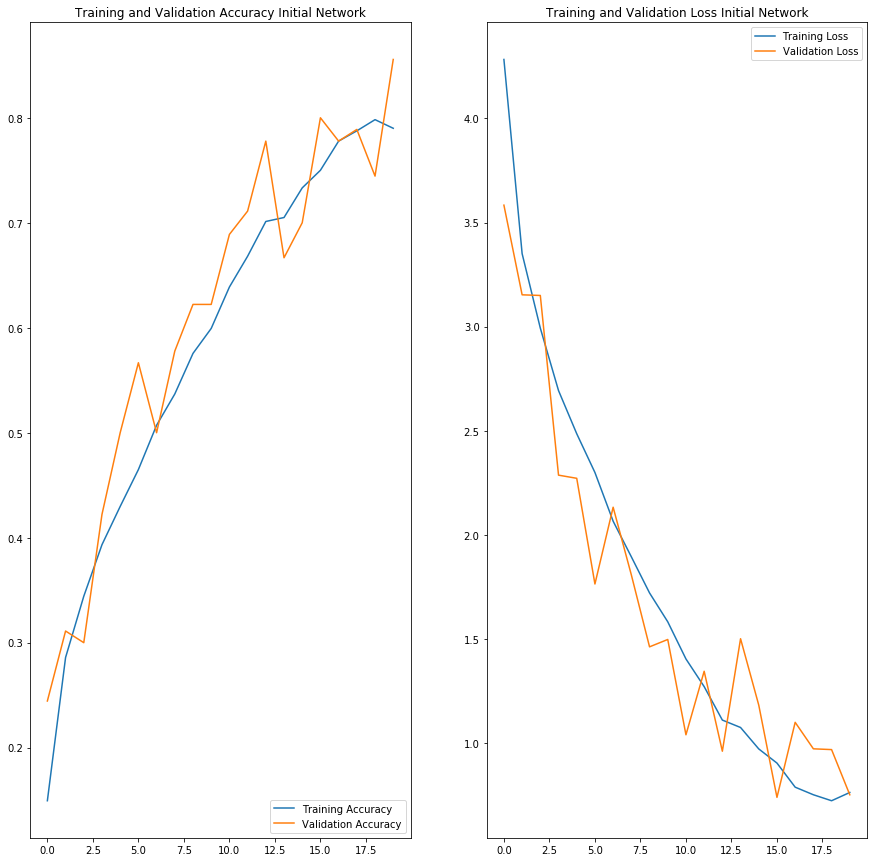

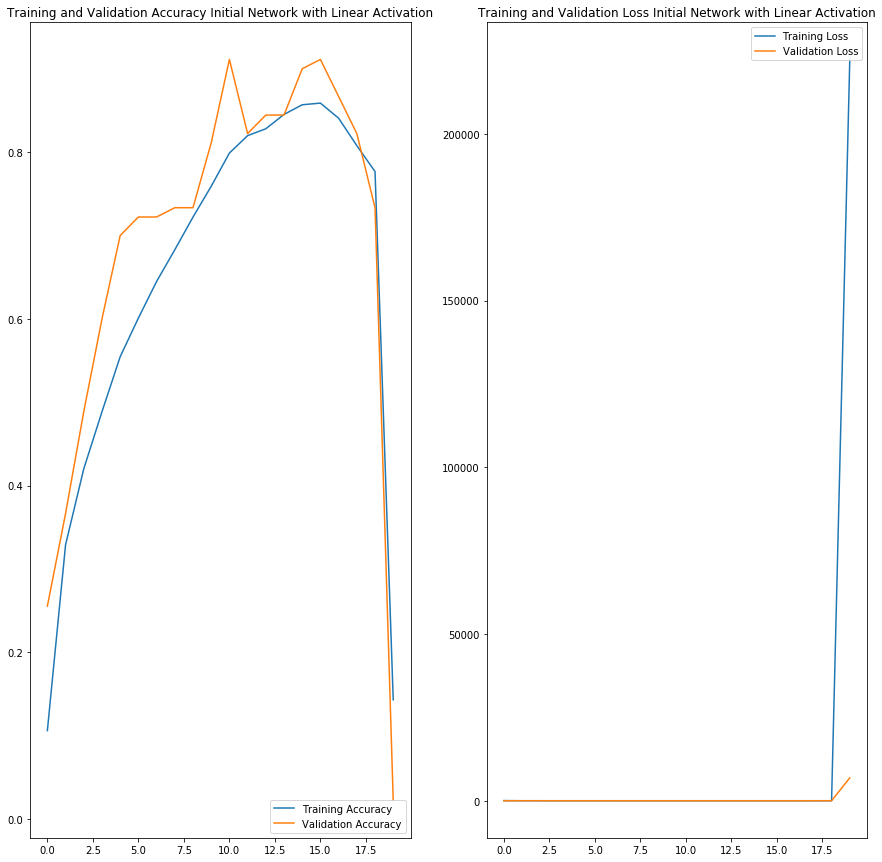

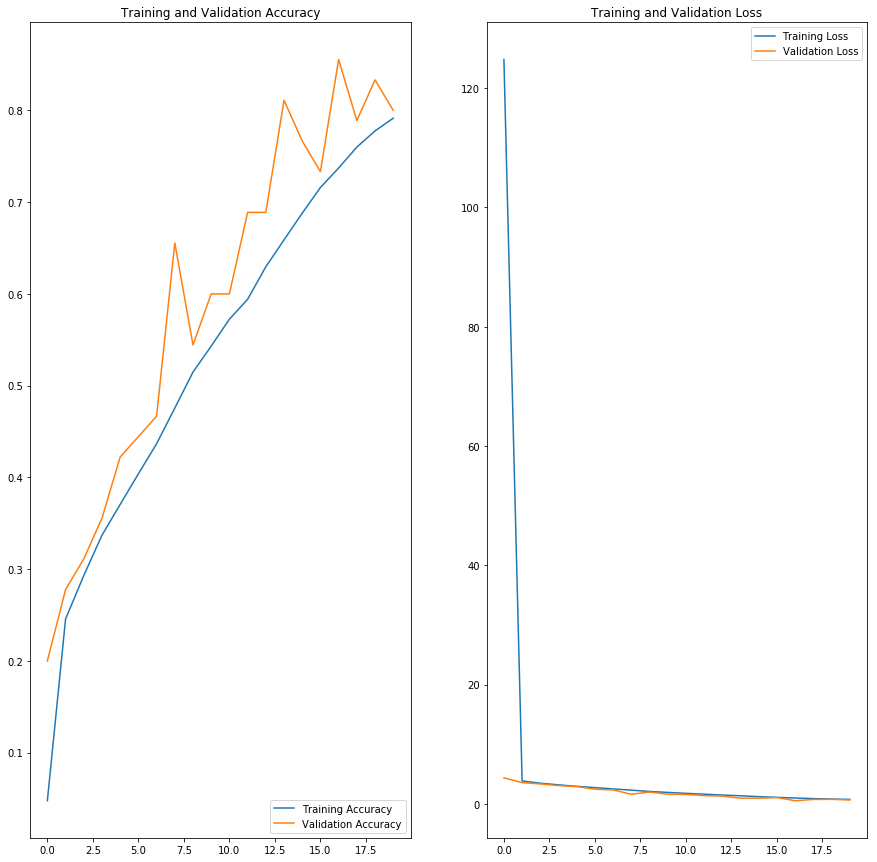

In [12]:
EPOCHS = 20

acc = history_initial.history['accuracy']
val_acc = history_initial.history['val_accuracy']

loss=history_initial.history['loss']
val_loss=history_initial.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy Initial Network')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss Initial Network')
plt.show()


acc = history_initial_Linear.history['accuracy']
val_acc = history_initial_Linear.history['val_accuracy']

loss=history_initial_Linear.history['loss']
val_loss=history_initial_Linear.history['val_loss']


epochs_range = range(EPOCHS)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy Initial Network with Linear Activation')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss Initial Network with Linear Activation')
plt.show()


acc = historyLinear.history['accuracy']
val_acc = historyLinear.history['val_accuracy']

loss=historyLinear.history['loss']
val_loss=historyLinear.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Result of Linear and Non Linear Activation (Results in the above graphs)

## Linear and non Linear

As it can be seen from the first two graphs which are from the initial_model network and initial_model_linear network.

These network are the vanila LeNet networks stated in the description of the assignment.

The results are not too different in terms of accuracy and loss but as it can be seen after a few epoches the accuracy of linear network decreses instantly and the loss increases. If it was just for the validation set then it can be because of overfitting but it was not the case.

Also the accuracy was not constantly increasing and thus it can be said that the training with non linear function was better.

## Increasing the number of layers for Linear Activation

As it can be seen in the third graph that the instant fall of accuracy was not observed but the nature of graph is very similar. Thus adding more layers can somewhat stabilize the network but after some more training the accuracy might fall instantly. Also the changes in accuracy in each epoch is more than expected.

Thus it can be said that having non linear activation results better

# Imporved network for better accuracy

As shown below I have used Batch normalization, dropout, relu and different number of filters to get a better accuraacy.

## 95% validation accuracy was observed

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 64, 64, 12)        336       
_________________________________________________________________
batch_normalization_4 (Batch (None, 64, 64, 12)        36        
_________________________________________________________________
activation_14 (Activation)   (None, 64, 64, 12)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 24)        10392     
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 24)        72        
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 24)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 32)       

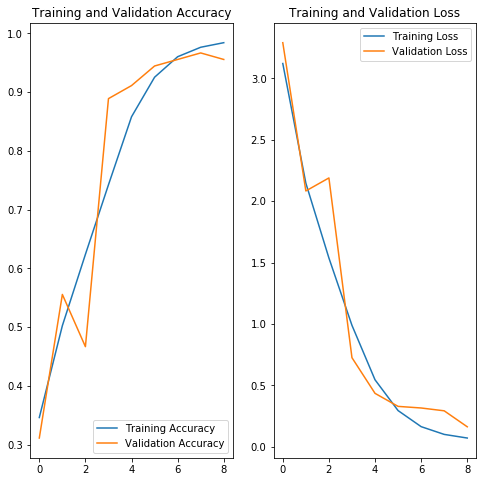

In [14]:

model = tf.keras.Sequential(
  [
      
      tf.keras.layers.Conv2D(kernel_size=3, filters=12, padding='same',input_shape=(64,64,3)),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),
      
      tf.keras.layers.Conv2D(kernel_size=6, filters=24, padding='same', strides=2),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),
      
      tf.keras.layers.Conv2D(kernel_size=6, filters=32, padding='same', strides=2),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),
      
      tf.keras.layers.Flatten(),
      
      tf.keras.layers.Dense(200),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),
      
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(101, activation='softmax')
  ])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# print model layers
model.summary()

steps_per_epoch = 9000//BATCH_SIZE  # 60,000 items in this dataset
EPOCHS = 9
print("Steps per epoch: ", steps_per_epoch)

history = model.fit(train_ds, steps_per_epoch=steps_per_epoch, epochs=EPOCHS,
                    validation_data=test_ds, validation_steps=1)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Some Prediction by the trained model

['menorah']


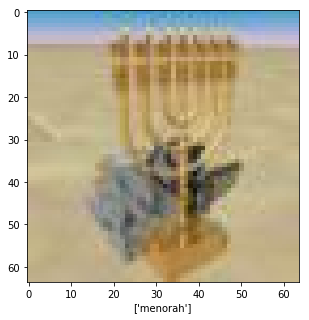

['windsor_chair']


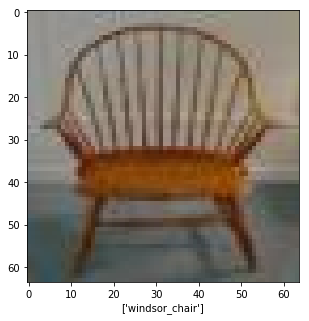

['lamp']


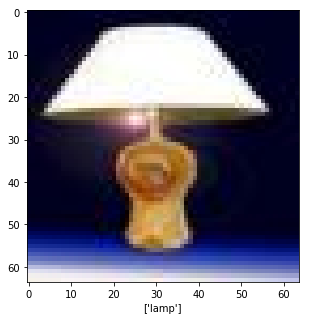

['airplanes']


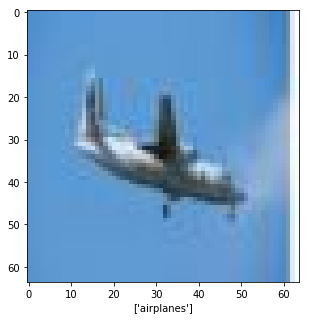

['kangaroo']


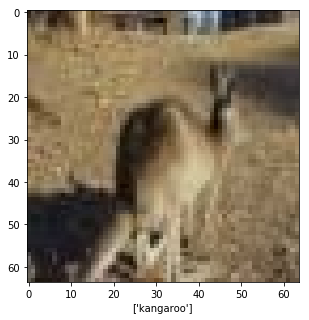

['llama']


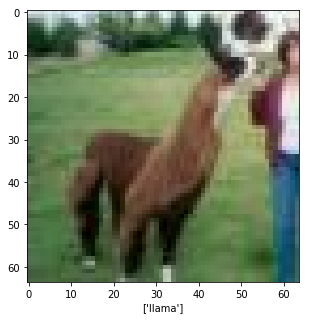

['lamp']


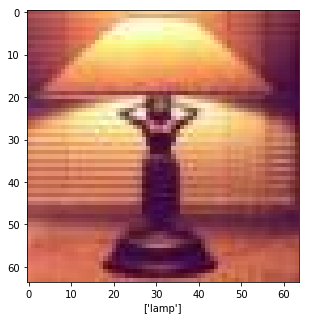

['starfish']


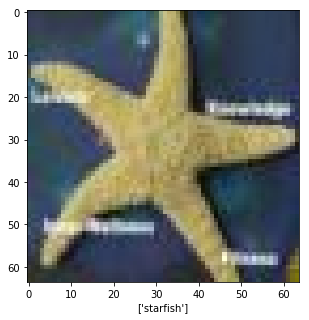

['airplanes']


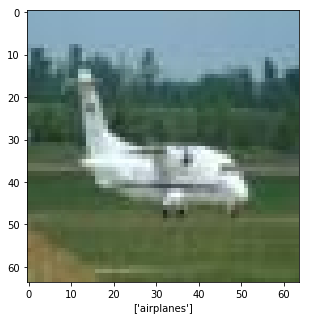

['Faces']


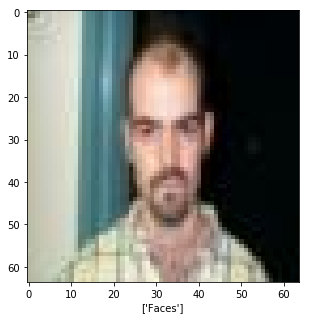

['crocodile']


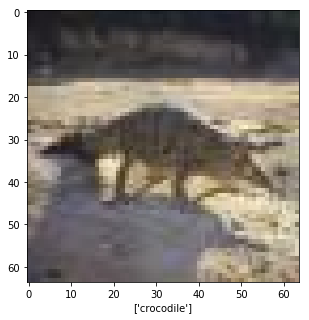

['Faces_easy']


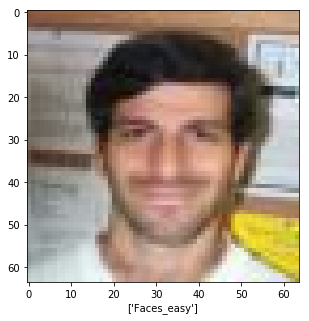

['kangaroo']


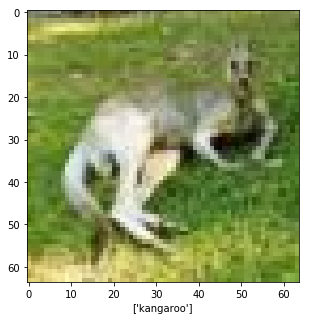

['electric_guitar']


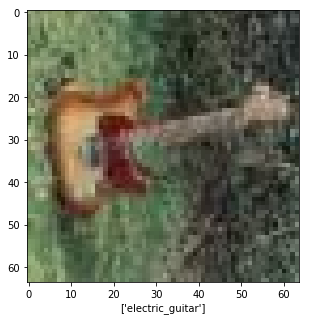

['pigeon']


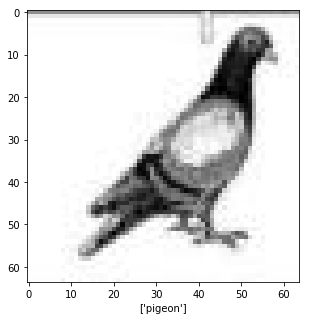

['lotus']


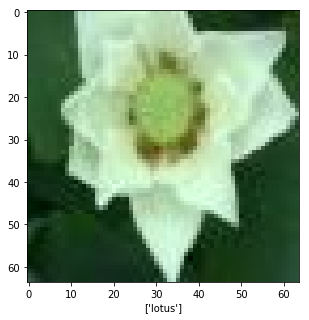

['airplanes']


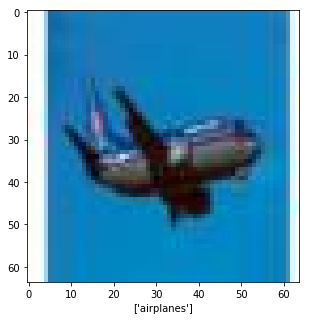

['dragonfly']


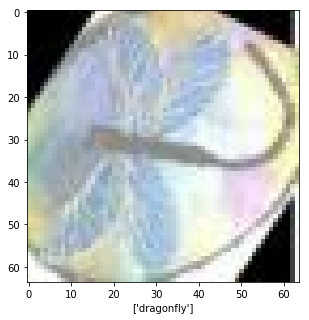

['menorah']


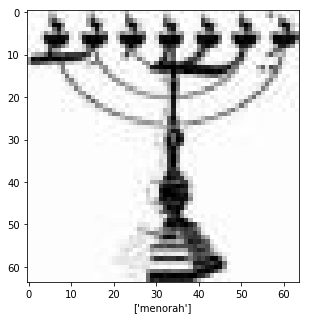

['inline_skate']


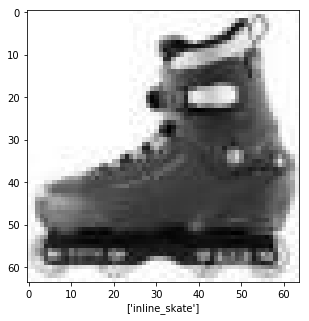

['airplanes']


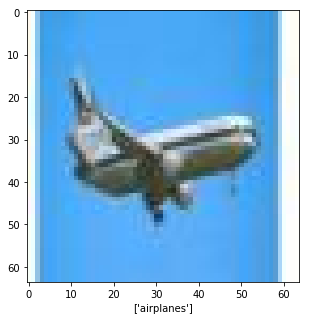

['yin_yang']


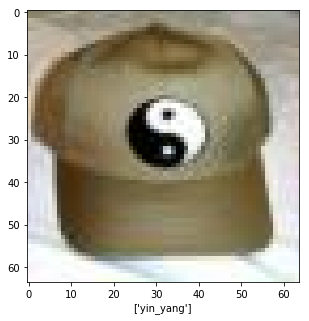

['umbrella']


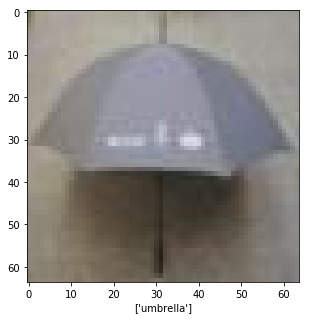

['chandelier']


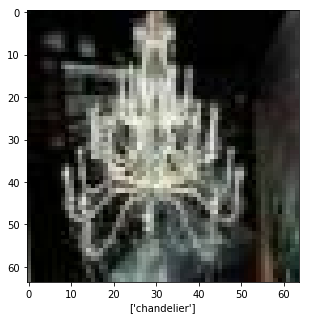

['minaret']


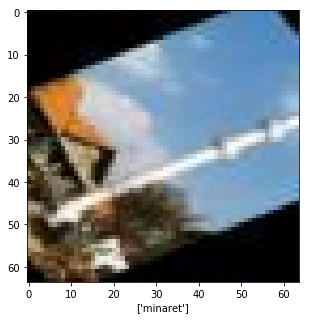

In [22]:
# print(test_dataset.take(1))
# image, label = test_dataset.take(1)


for example in test_dataset.take(25):
    image, label = example[0], example[1]
    print(Labels[np.where(label.numpy() == True)])
    probabilities = model.predict(image.numpy().reshape(1,64,64,3), steps=1)
    # print(probabilities)
    
    predicted_labels = np.argmax(probabilities, axis=1)
    # print(predicted_labels)

    plt.figure(figsize=(5,5))
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(Labels[predicted_labels])
    plt.show()



# Visualize the intermediate layers 

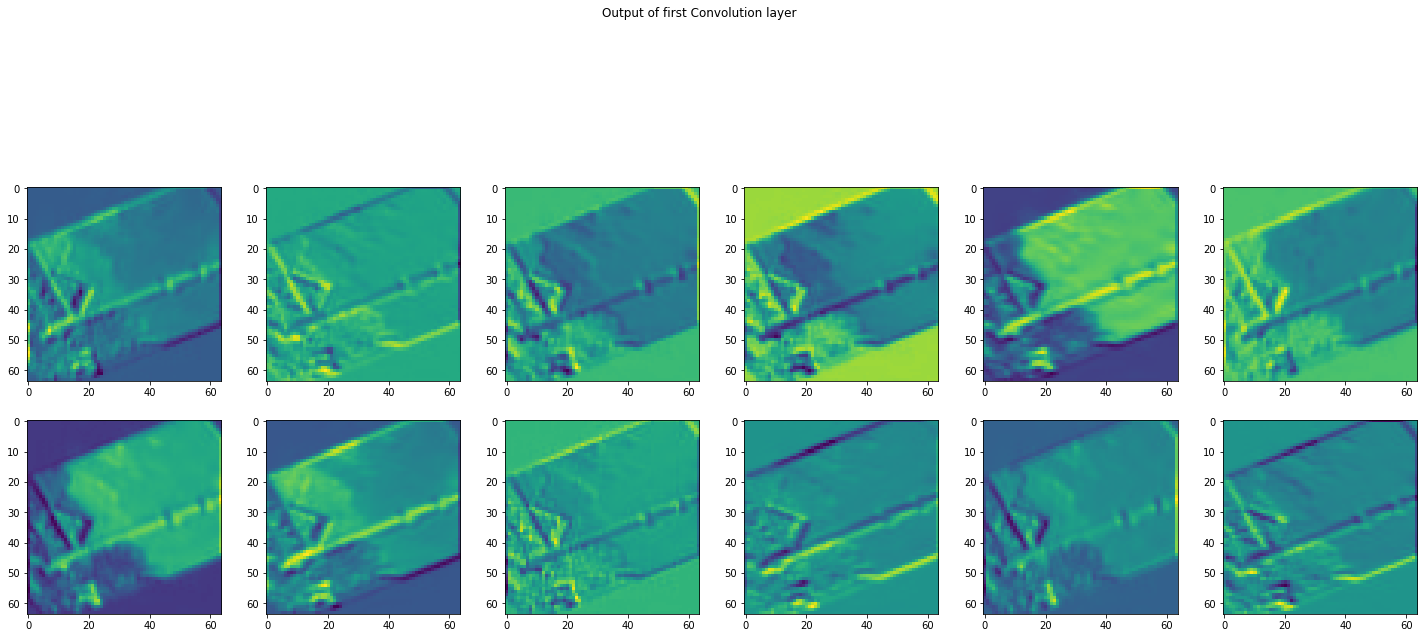

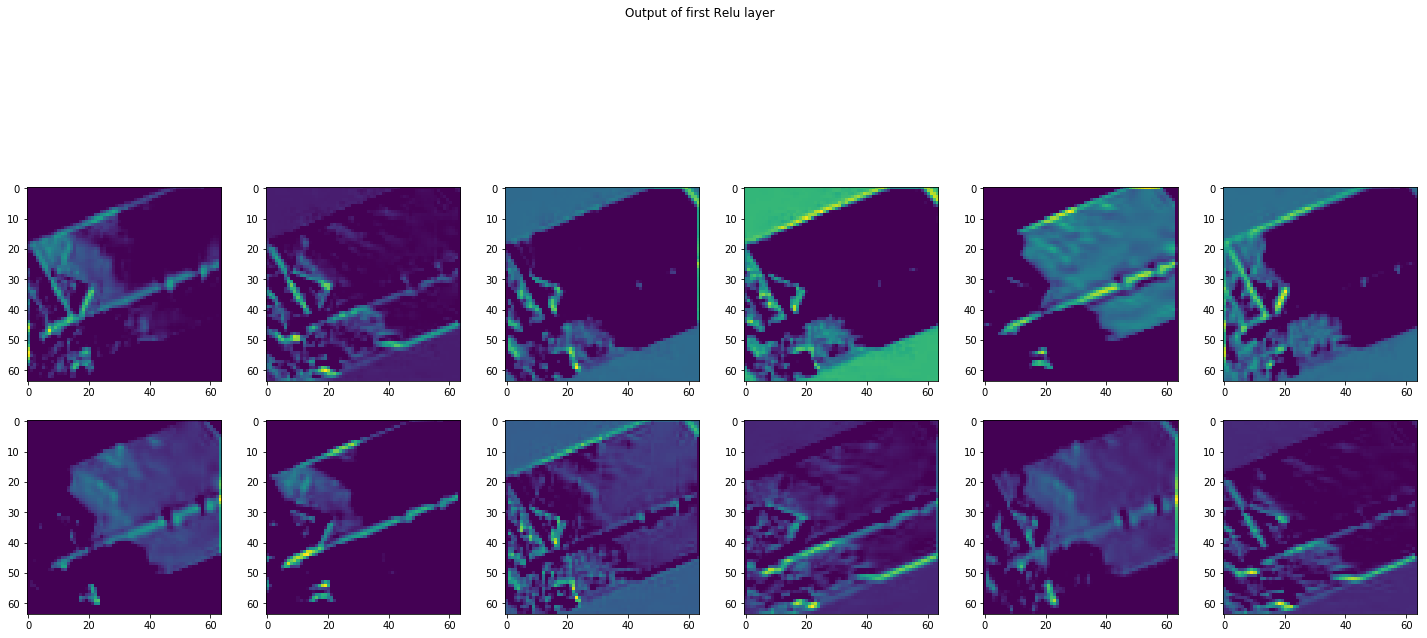

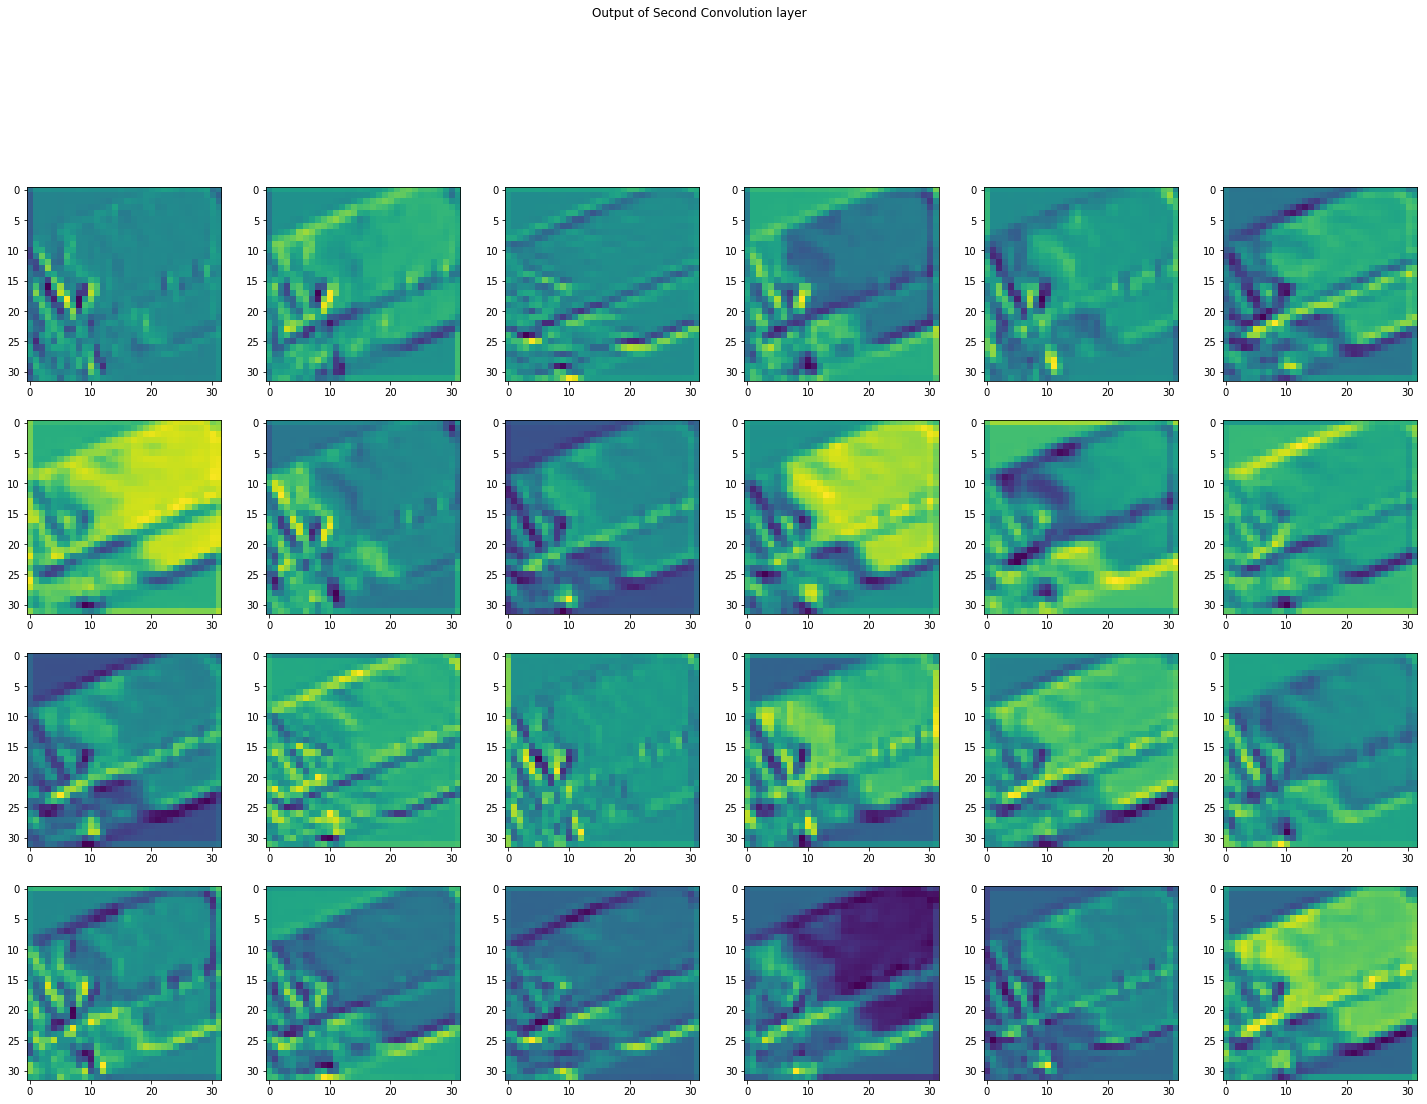

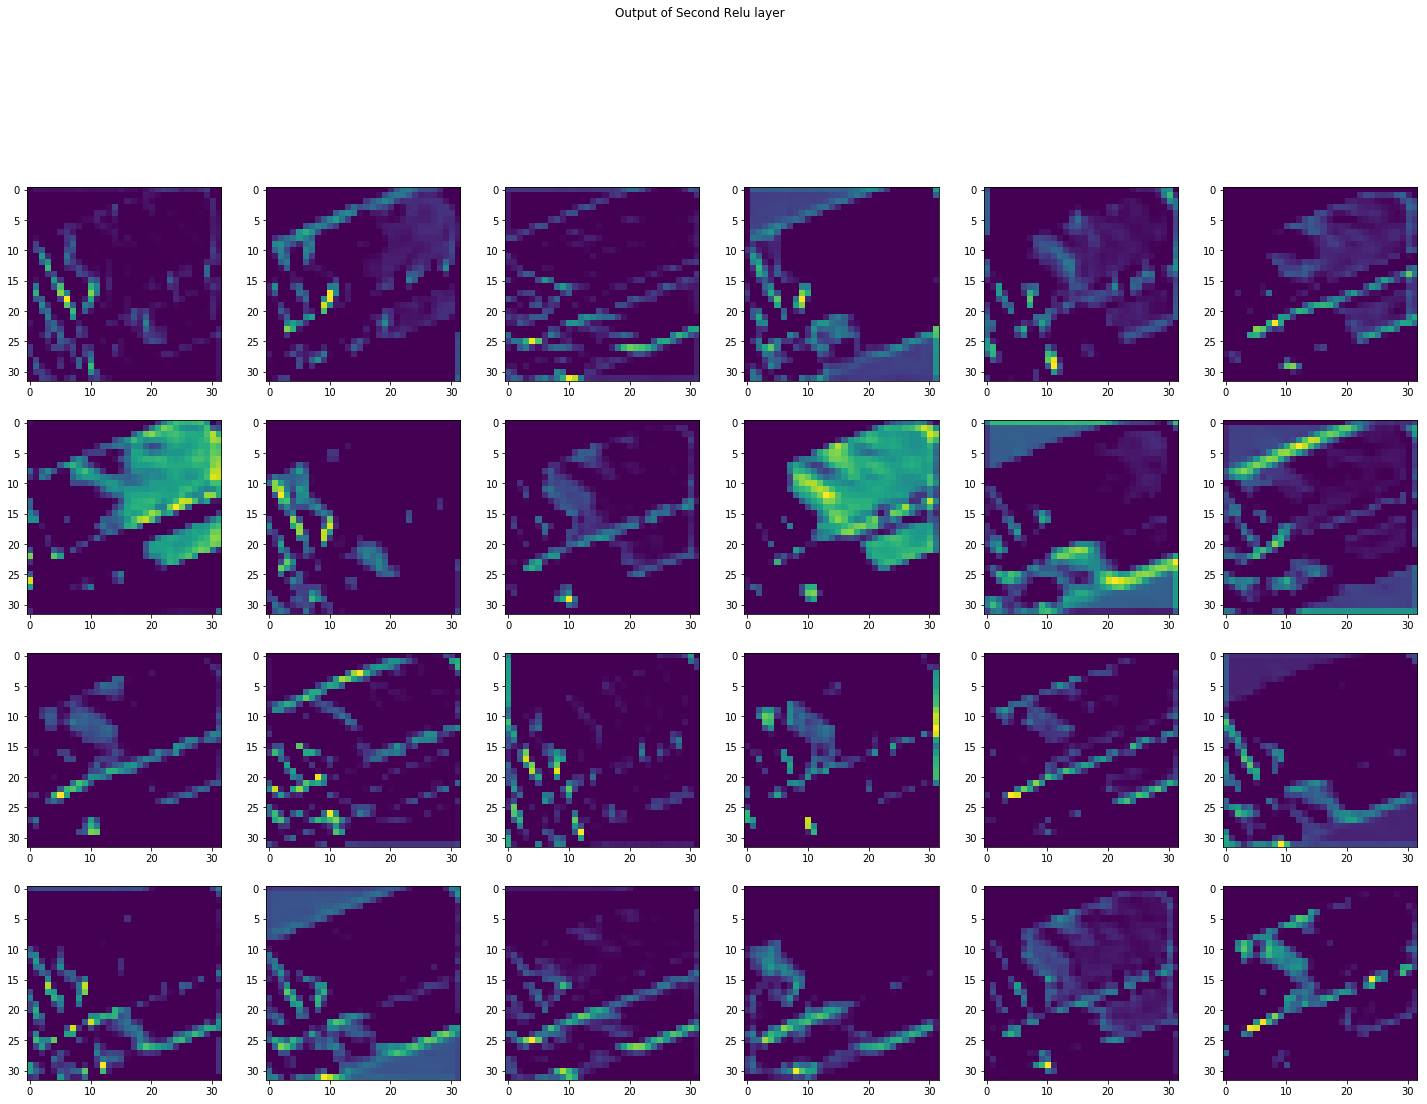

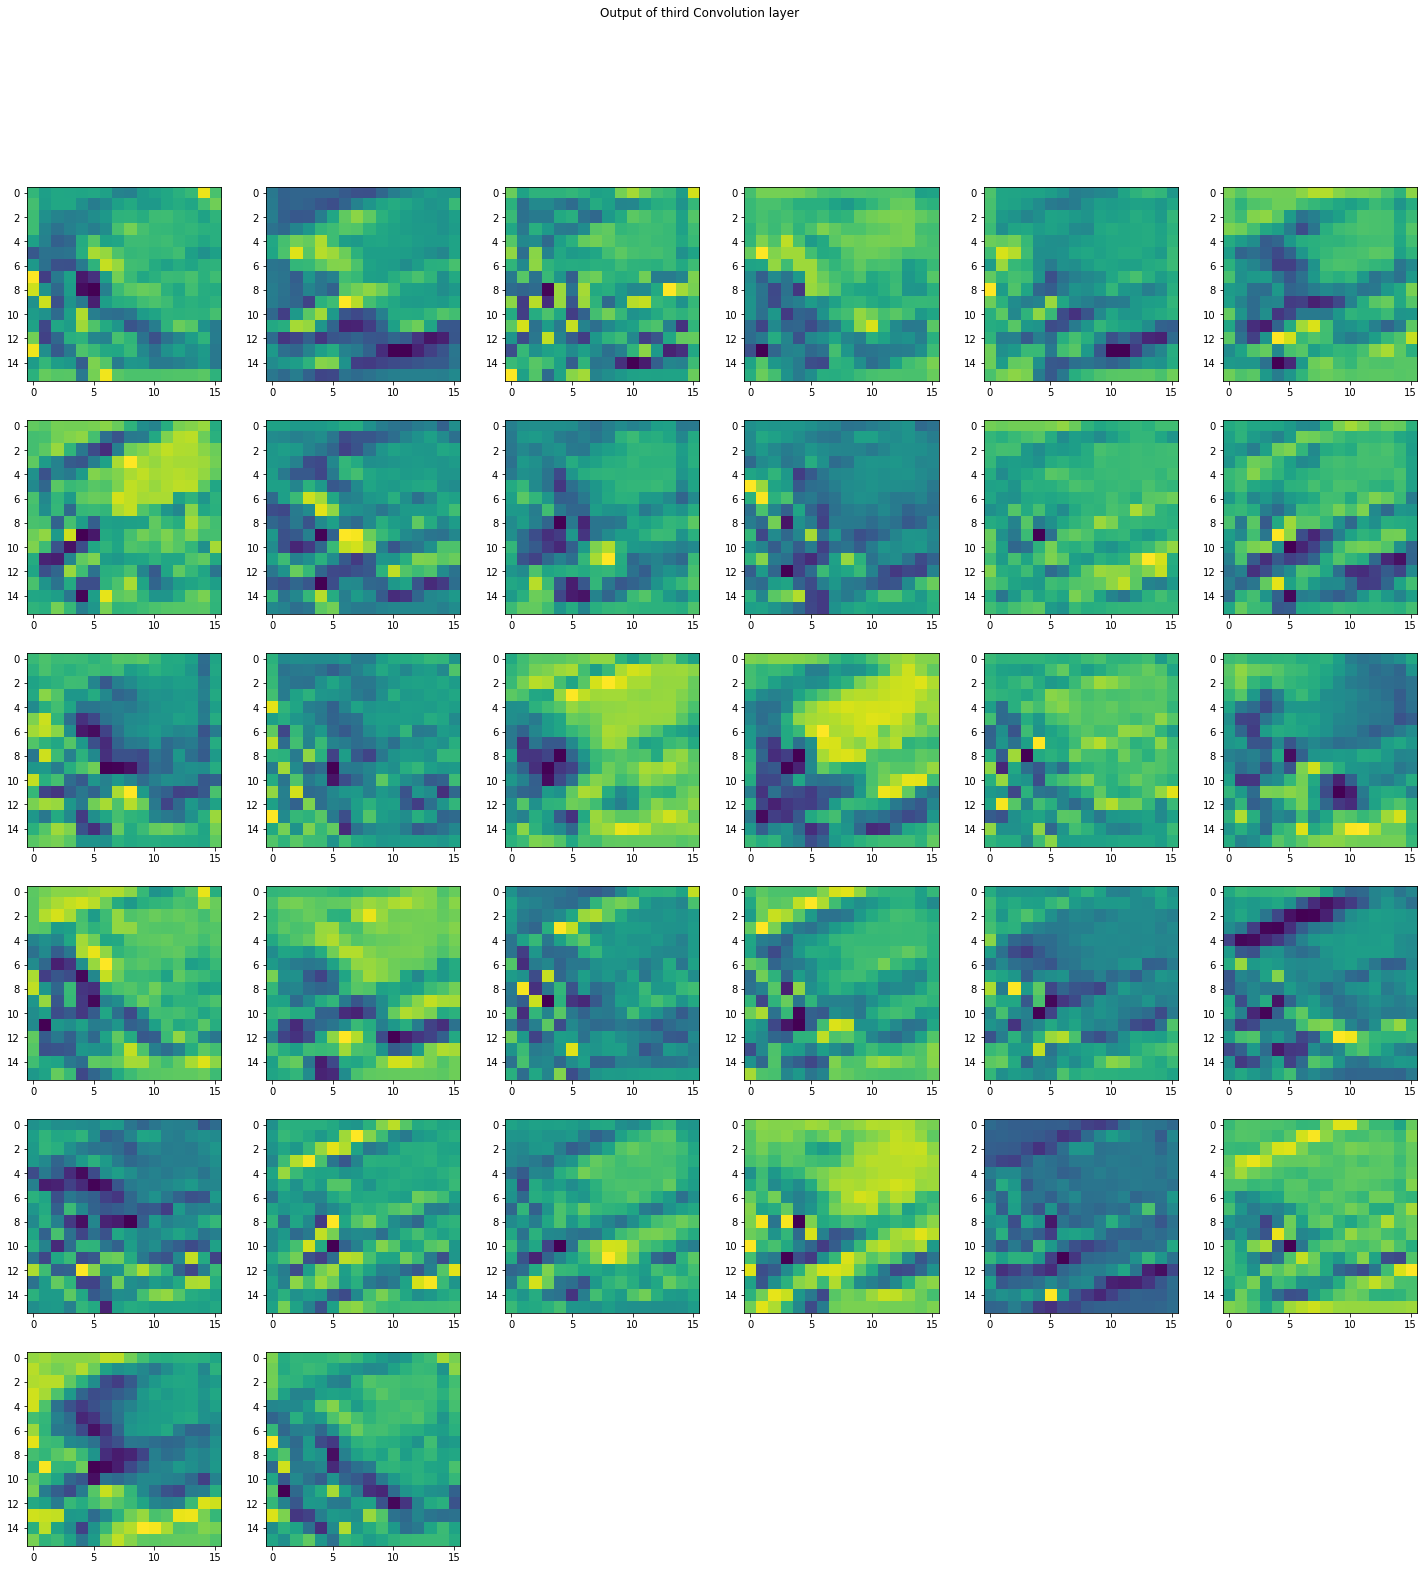

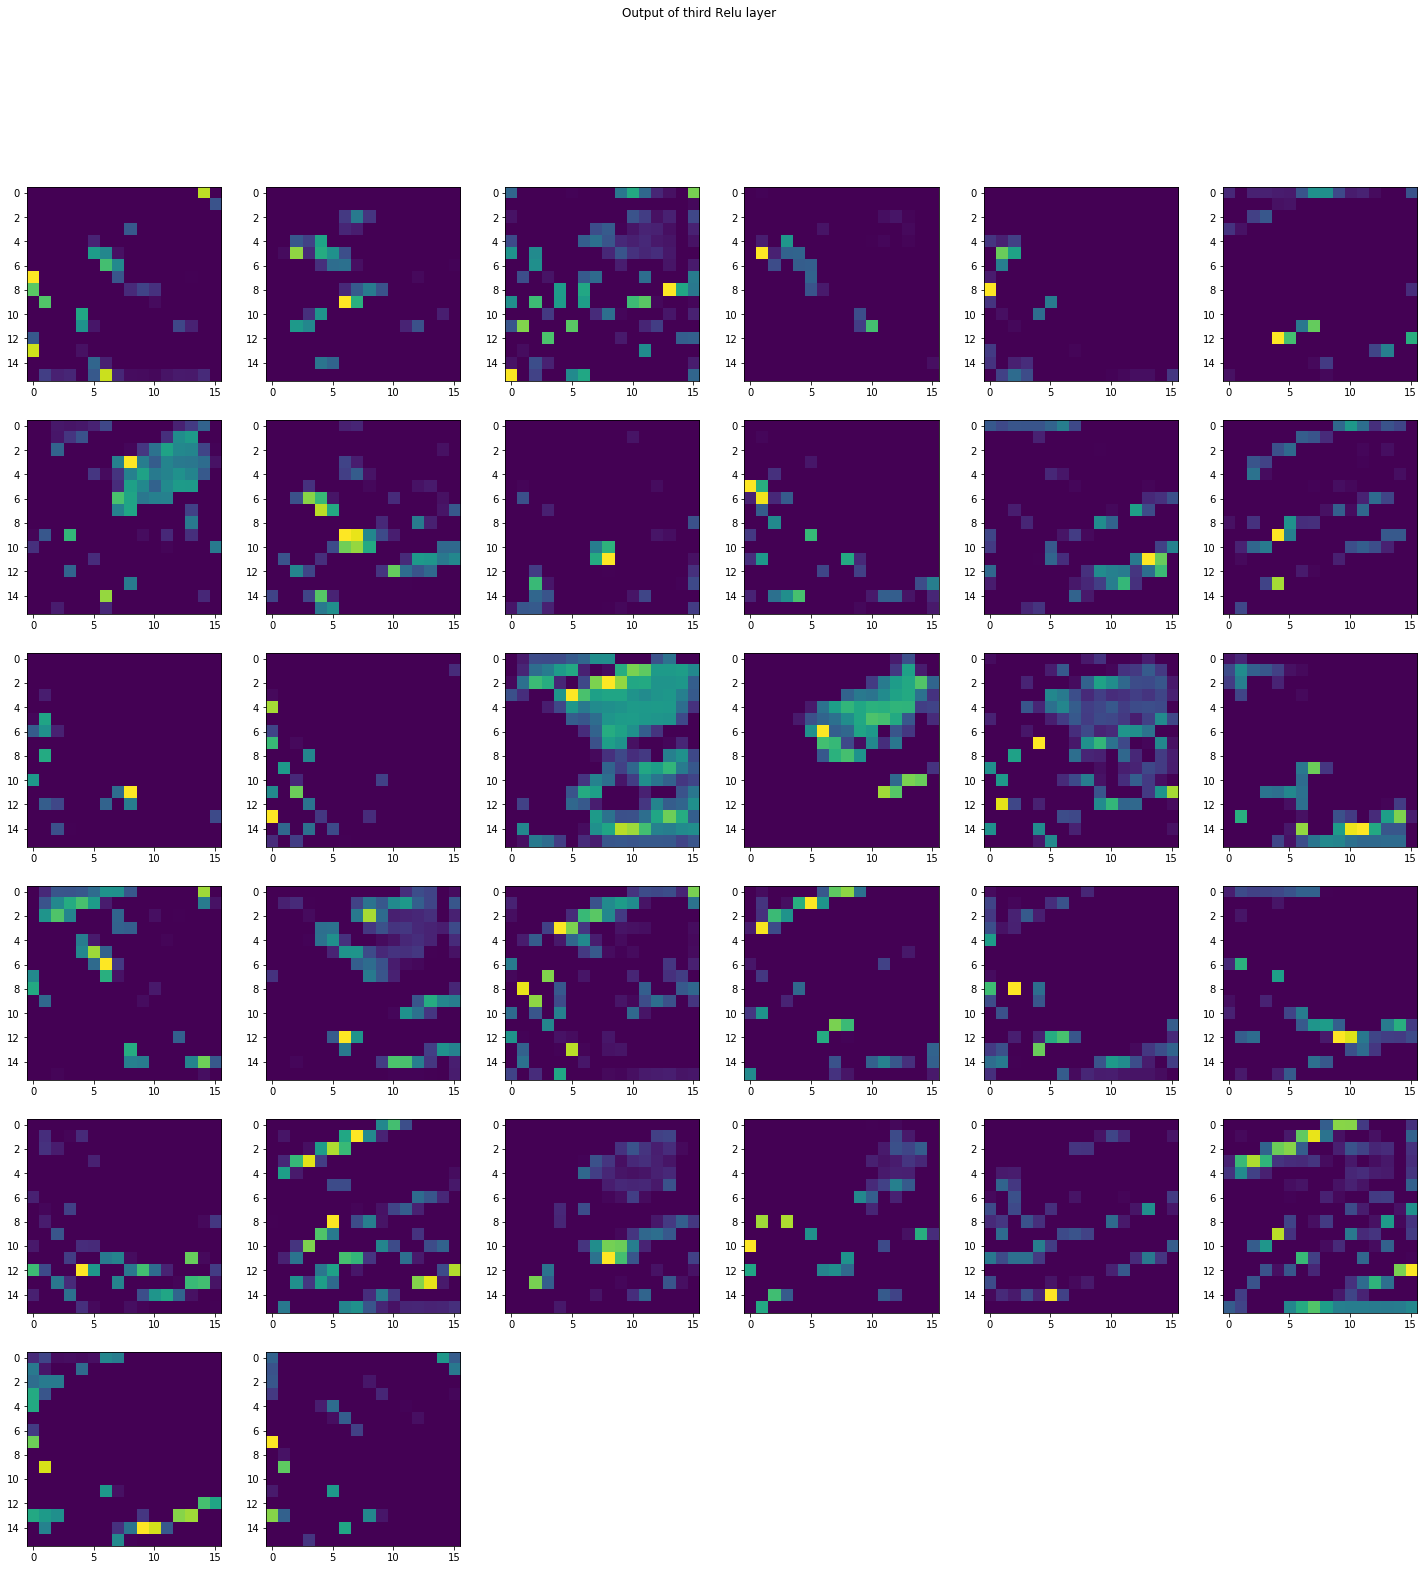

In [23]:
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input
activations = activation_model.predict(image.numpy().reshape(1,64,64,3)) # Returns a list of five Numpy arrays: one array per layer activation
first_layer_activation = activations[0]


second_layer_activation = activations[2]


third_layer_activation = activations[3]


forth_layer_activation = activations[5]


fifth_layer_activation = activations[6]


sixth_layer_activation = activations[8]


# plt.matshow(first_layer_activation[0, :, :, 0], cmap='viridis')
# plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')
# plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
# plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
# plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')
# plt.matshow(first_layer_activation[0, :, :, 6], cmap='viridis')
# plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')
# plt.matshow(first_layer_activation[0, :, :, 8], cmap='viridis')
# plt.matshow(first_layer_activation[0, :, :, 9], cmap='viridis')


plt.figure(figsize=(25, 25))
plt.suptitle("Output of first Convolution layer")
for i in range (0,12):
    plt.subplot(6, 6, i+1)
    plt.imshow(first_layer_activation[0, :, :, i])

plt.show()

plt.figure(figsize=(25, 25))
plt.suptitle("Output of first Relu layer")
for i in range (0,12):
    plt.subplot(6, 6, i+1)
    plt.imshow(second_layer_activation[0, :, :, i], cmap='viridis')

plt.show()

plt.figure(figsize=(25, 25))
plt.suptitle("Output of Second Convolution layer")
for i in range (0,24):
    plt.subplot(6, 6, i+1)
    plt.imshow(third_layer_activation[0, :, :, i], cmap='viridis')

plt.show()


plt.figure(figsize=(25, 25))
plt.suptitle("Output of Second Relu layer")
for i in range (0,24):
    plt.subplot(6, 6, i+1)
    plt.imshow(forth_layer_activation[0, :, :, i], cmap='viridis')

plt.show()


plt.figure(figsize=(25, 25))
plt.suptitle("Output of third Convolution layer")
for i in range (0,32):
    plt.subplot(6, 6, i+1)
    plt.imshow(fifth_layer_activation[0, :, :, i], cmap='viridis')

plt.show()


plt.figure(figsize=(25, 25))
plt.suptitle("Output of third Relu layer")
for i in range (0,32):
    plt.subplot(6, 6, i+1)
    plt.imshow(sixth_layer_activation[0, :, :, i], cmap='viridis')

plt.show()


# plt.figure(figsize=(15, 15))
# for i in range (0,12):
#     plt.subplot(6, 6, i+1)
#     plt.imshow(seventh_layer_activation[0, :, :, i], cmap='viridis')
# plt.show()

# plt.figure(figsize=(15, 15))
# for i in range (0,12):
#     plt.subplot(6, 6, i+1)
#     plt.imshow(seventh_layer_activation[0, :, :, i], cmap='viridis')
# plt.show()

# plt.figure(figsize=(15, 15))
# for i in range (0,12):
#     plt.subplot(6, 6, i+1)
#     plt.imshow(seventh_layer_activation[0, :, :, i], cmap='viridis')
# plt.show()

# plt.figure(figsize=(15, 15))
# for i in range (0,12):
#     plt.subplot(6, 6, i+1)
#     plt.imshow(seventh_layer_activation[0, :, :, i], cmap='viridis')
# plt.show()






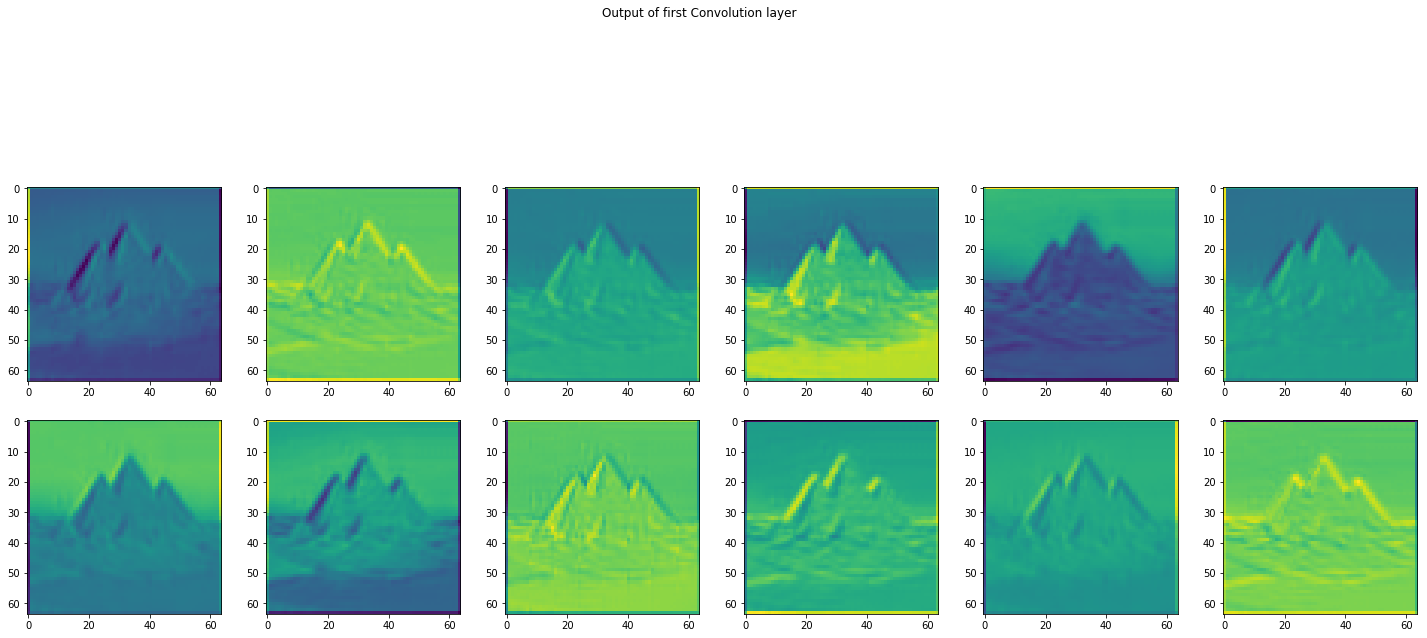

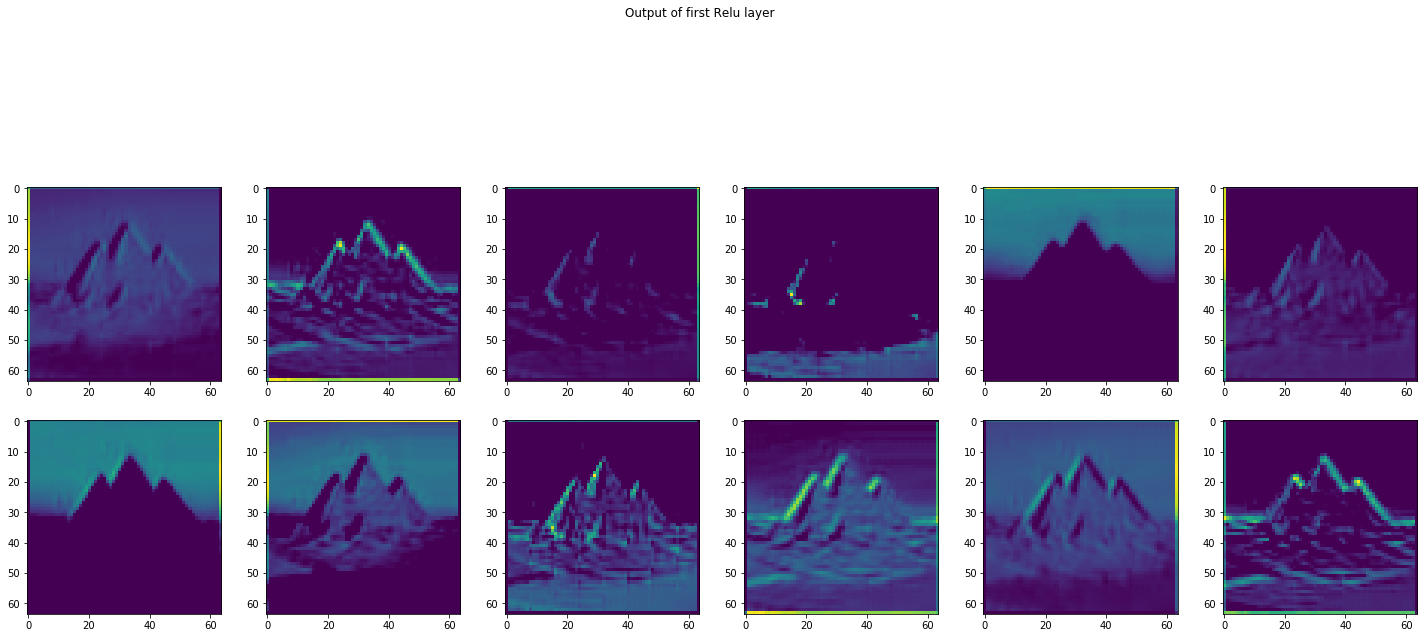

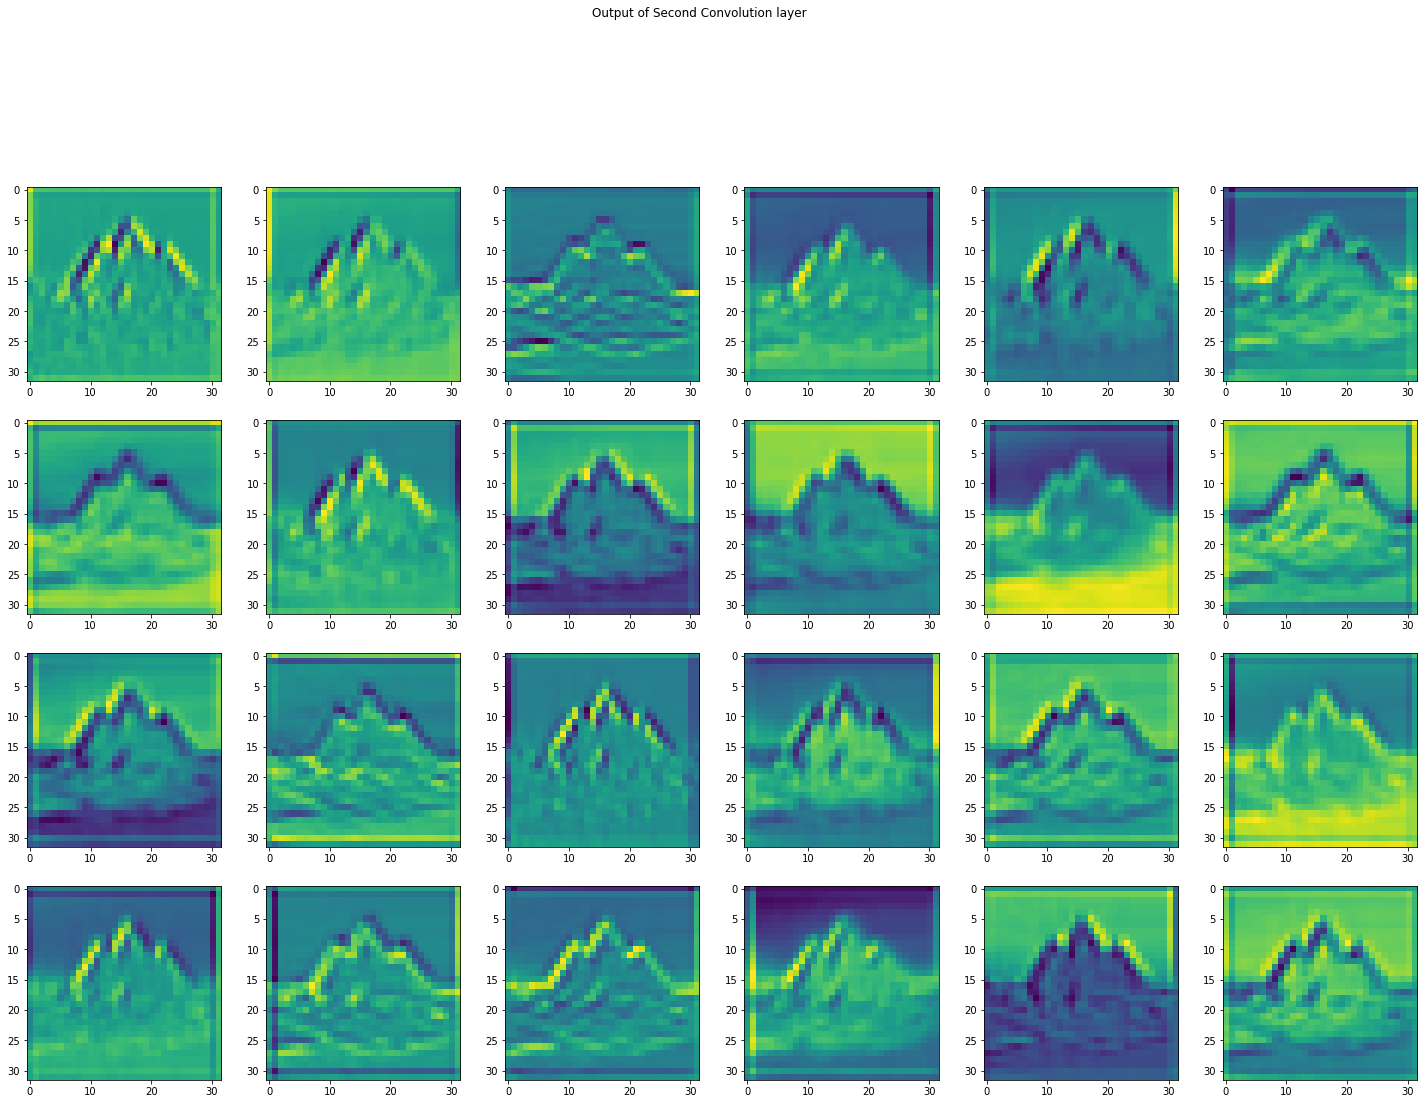

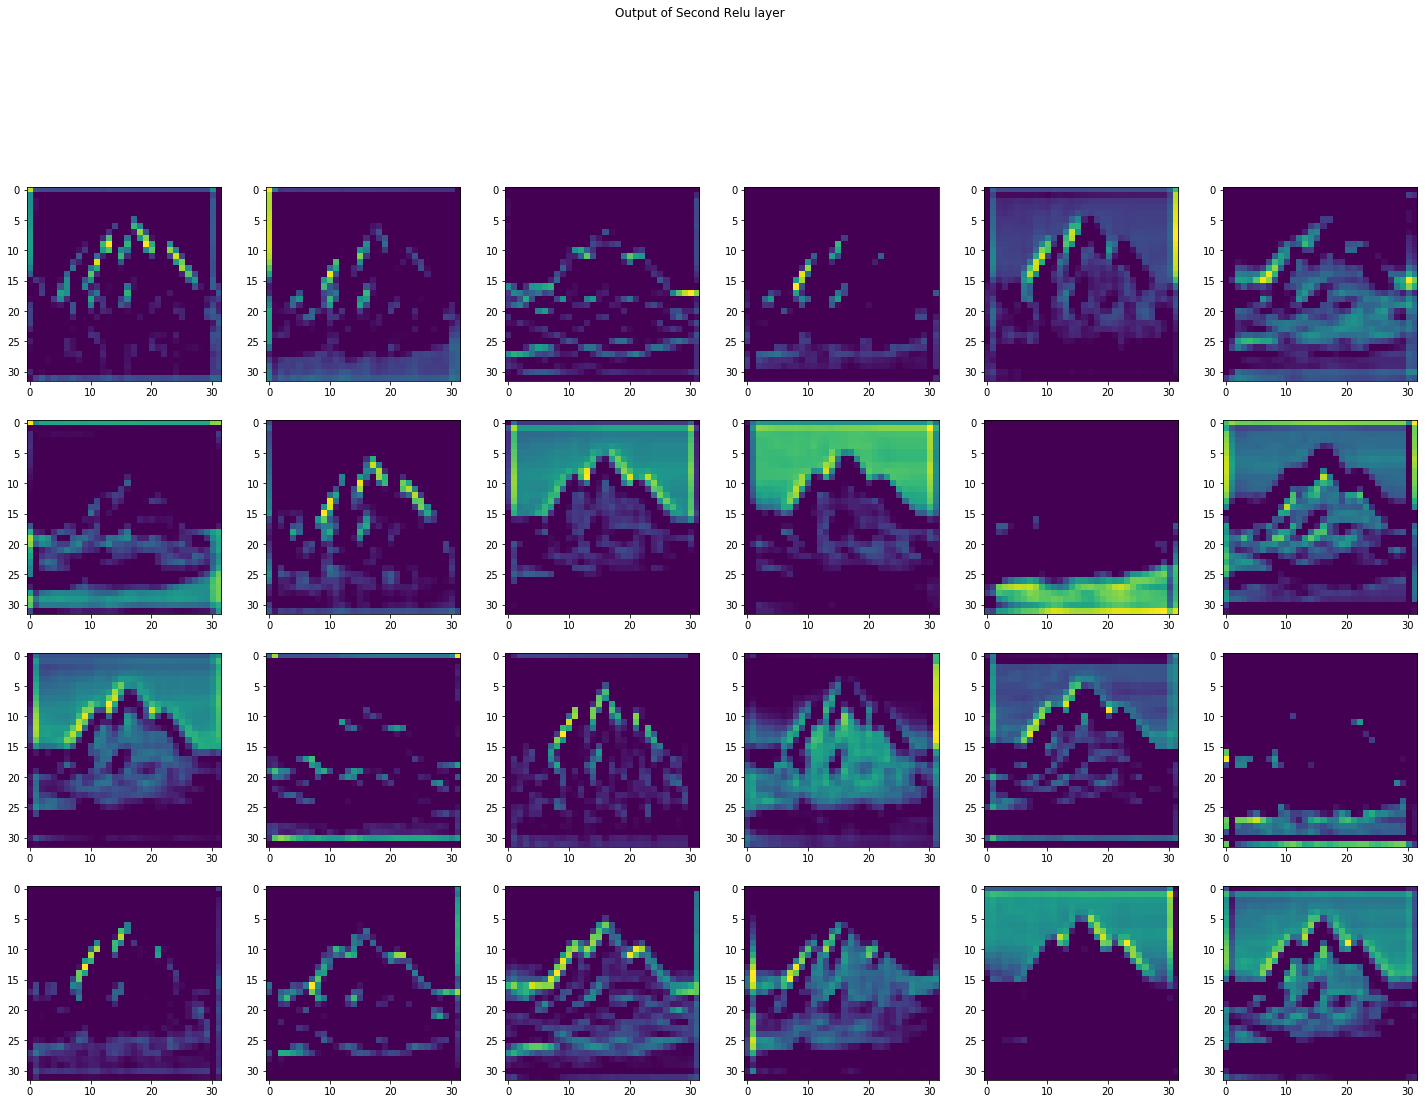

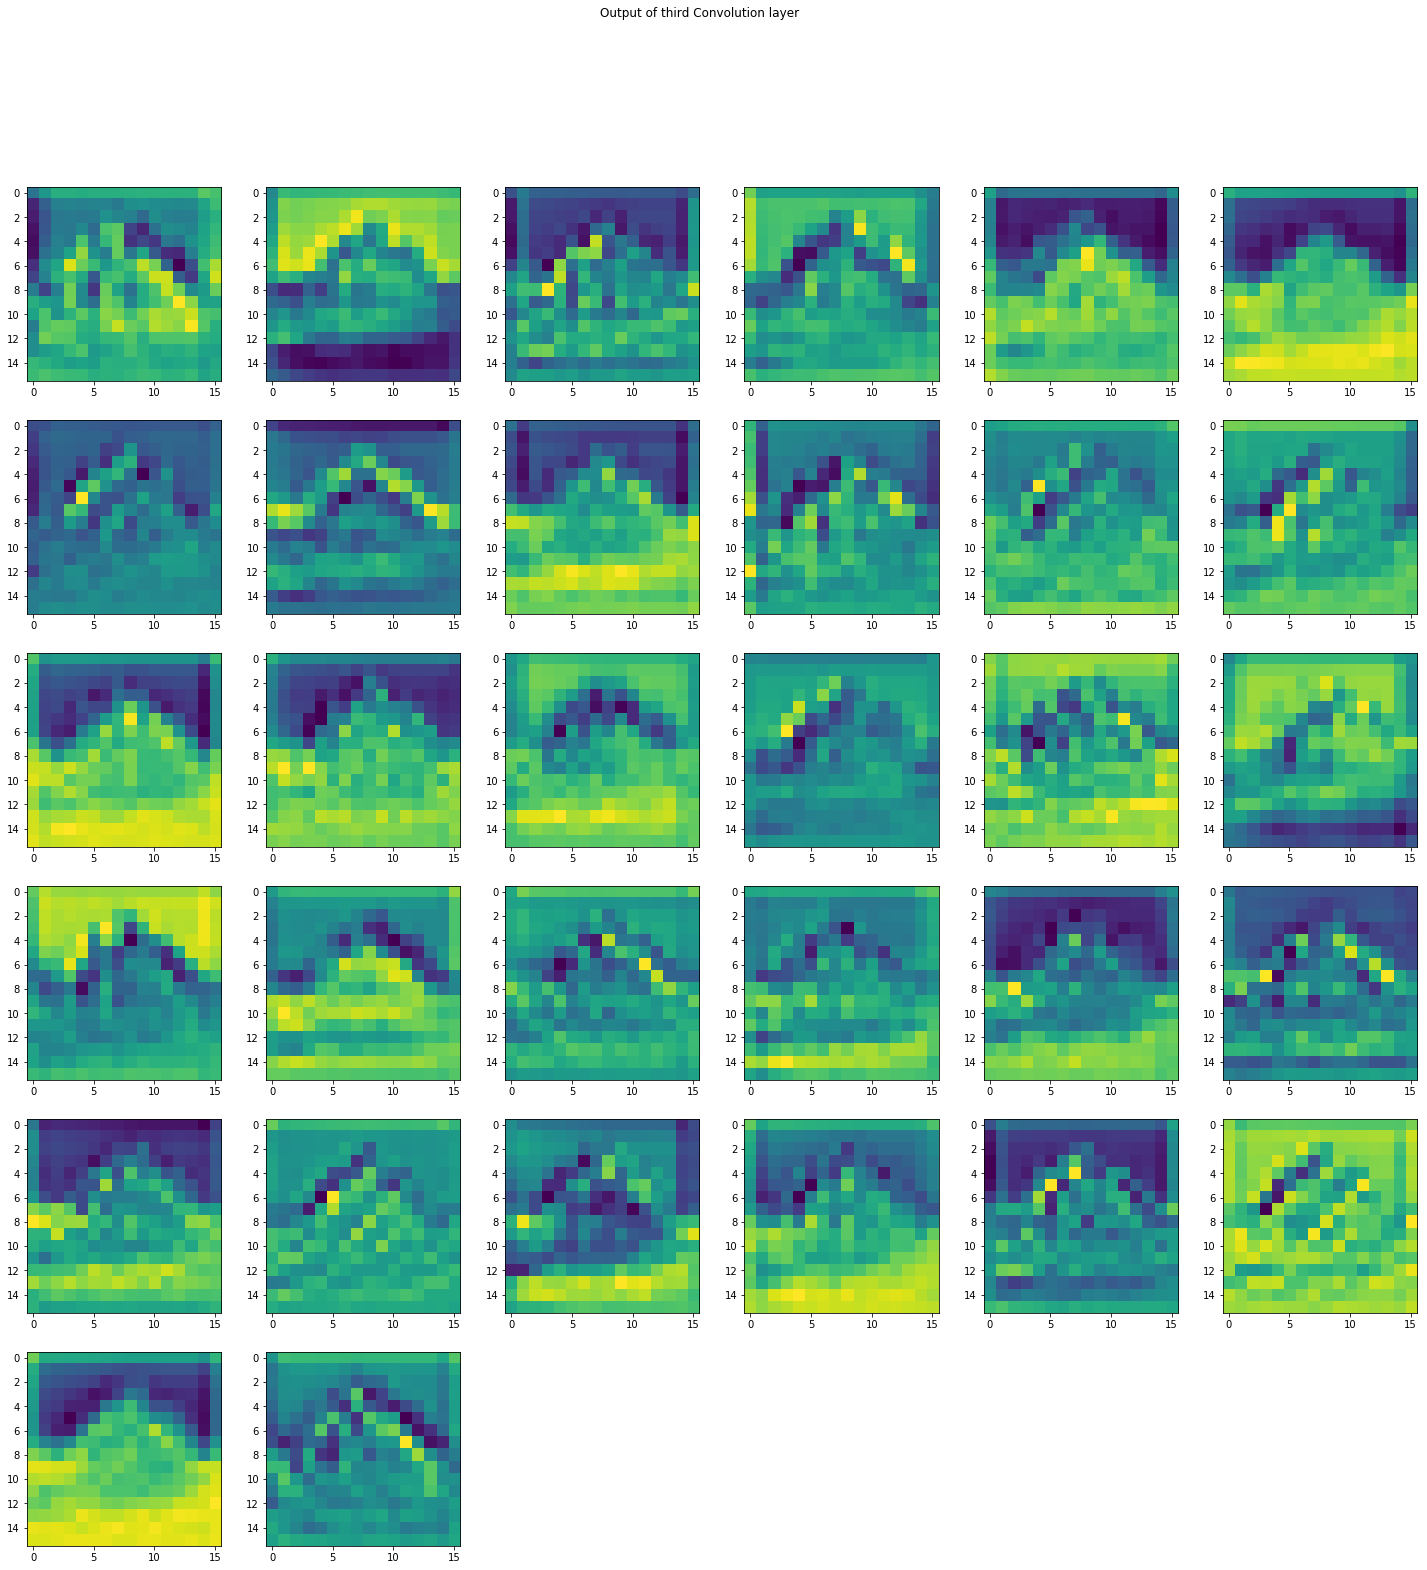

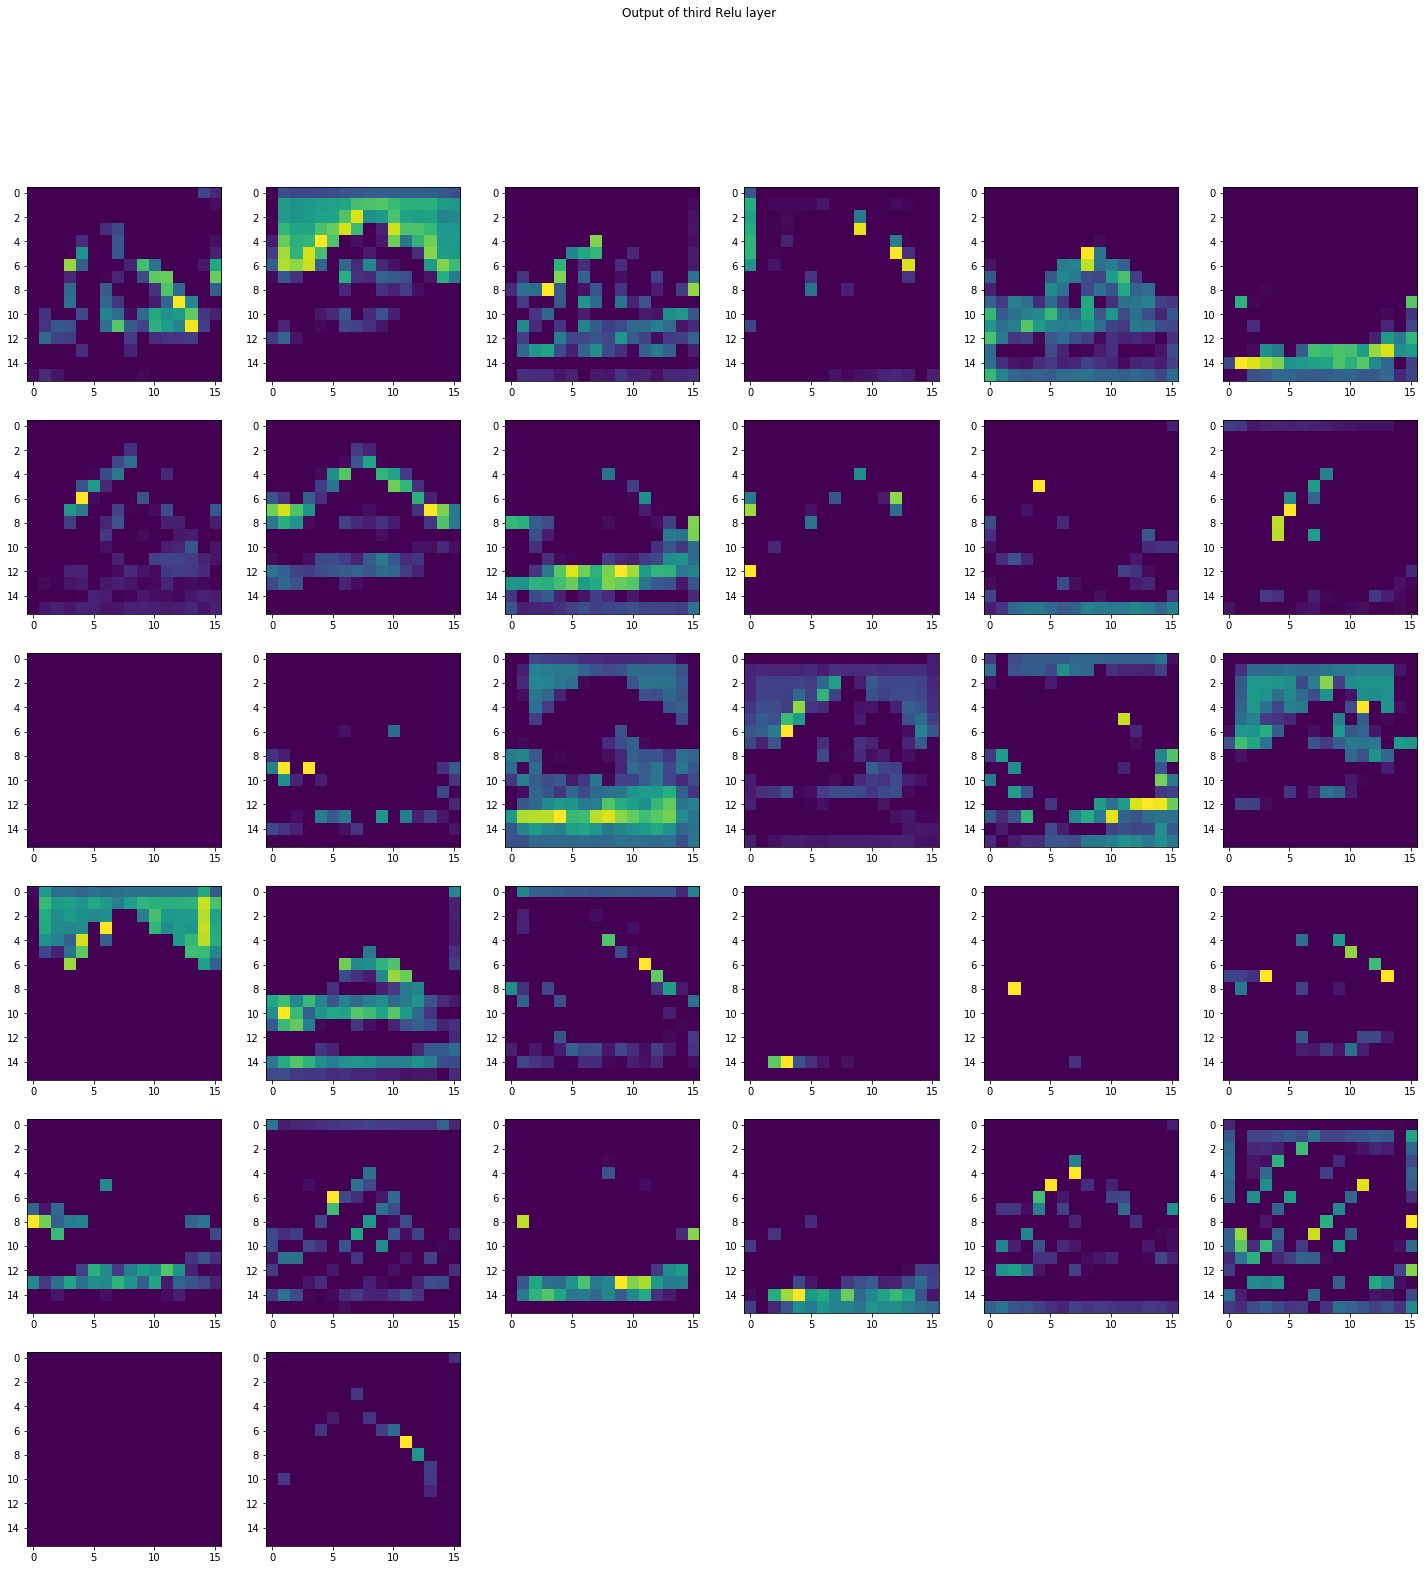